### Домашнее задание к уроку 2.

In [220]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from linear_regression import linear_regression
from sklearn.linear_model import LinearRegression as sklearn_LR
%matplotlib inline

In [221]:
# L2 - регуляризация с поправочным коэффициентом alpha:
alpha = 1.0
coef_l2 = sum(w**2)
coef_l2

array([0.96049176, 1.11084594])

In [222]:
# Возьмем 2 признака и 1000 объектов
n_features = 2
n_objects = 1000

# сгенерируем вектор истинных весов
w_true = np.random.normal(size=(1, n_features ))

# сгенерируем матрицу X, вычислим Y с добавлением случайного шума
X = np.random.uniform(-7, 7, (n_objects, n_features))
Y = X.dot(w_true.T) + np.random.normal(0, 0.5, size=(n_objects, 1))

# возьмем нулевые начальные веса
w = np.zeros((1, n_features))

In [223]:
# реализуем функцию, определяющую среднеквадратичную ошибку
def mserror(X, w, y_real):
    y = X.dot(w.T)
    return np.sum((y - y_real)**2) / y_real.shape[0] + alpha*coef_l2

In [224]:
mserror(X, w_true, Y), mserror(X, w, Y)

(array([1.21913329, 1.36948748]), array([49.31779279, 49.46814697]))

In [225]:
# реализуем функцию, определяющую градиент среднеквадратичной ошибки
def mserror_grad(X, w, y_real):
    return 2*(X.dot(w.T)-y_real).T.dot(X)/y_real.shape[0] + alpha*coef_l2

In [226]:
mserror_grad(X, w_true, Y)

array([[0.88843844, 1.18987624]])

In [227]:
mserror_grad(X, w, Y)

array([[ 49.88842015, -25.61634426]])

In [228]:
# список векторов весов после каждой итерации
w_list = [w.copy().flatten()]

# список значений ошибок после каждой итерации
errors = []

# шаг градиентного спуска
eta = 0.02

# максимальное число итераций
max_iter = 1e4

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0

# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    new_w = w -  eta * mserror_grad(X, w, Y)
    weight_dist = np.linalg.norm(new_w - w)
    
    w_list.append(new_w.copy().flatten())
    cur_error=mserror(X, new_w, Y)
    print('curent error: {0}'.format(cur_error))
    errors.append(mserror(X, new_w, Y))
    
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)

print(X.shape, w.shape)

curent error: [7.12166439 7.27201857]
curent error: [1.92921526 2.07956945]
curent error: [1.31453875 1.46489293]
curent error: [1.25119502 1.4015492 ]
curent error: [1.2483912  1.39874538]
curent error: [1.24994636 1.40030054]
curent error: [1.25084441 1.40119859]
curent error: [1.25121508 1.40156926]
curent error: [1.25135595 1.40171013]
curent error: [1.25140804 1.40176223]
curent error: [1.25142711 1.40178129]
curent error: [1.25143405 1.40178823]
curent error: [1.25143656 1.40179075]
curent error: [1.25143748 1.40179166]
curent error: [1.25143781 1.40179199]
curent error: [1.25143793 1.40179211]
curent error: [1.25143797 1.40179215]
curent error: [1.25143798 1.40179217]
curent error: [1.25143799 1.40179217]
(1000, 2) (1, 2)


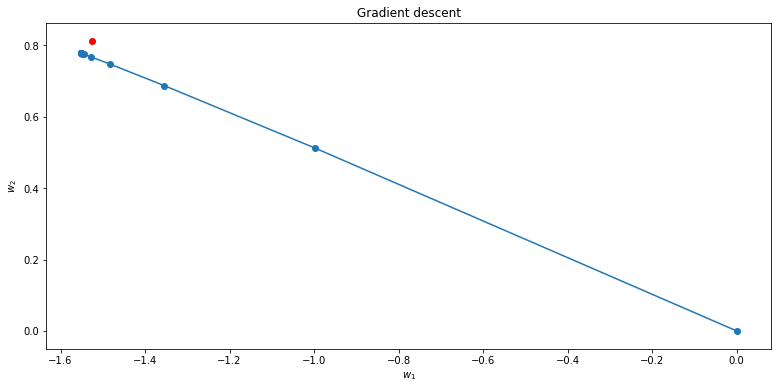

In [229]:
# Визуализируем изменение весов (красной точкой обозначены истинные веса, сгенерированные вначале)
plt.figure(figsize=(13, 6))
plt.title('Gradient descent')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_list[:, 0], w_list[:, 1])
plt.scatter(w_true[0, 0], w_true[0, 1], c='r')
plt.plot(w_list[:, 0], w_list[:, 1])

plt.show()